<a href="https://colab.research.google.com/github/Shalu-Khebang/Simple_AI_Projects/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Lab Assignment: Data Analysis on Wine Quality Dataset
# Author:[Shalu Khebang (078BCT082)]
# Dataset Source: UCI Machine Learning Repository



In [ ]:
# Step 1: Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # improve plot aesthetics

In [ ]:
# Step 2: Load Dataset from UCI Repository
# -------------------------------
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Load datasets
red_wine_df = pd.read_csv(red_wine_url, sep=';')
white_wine_df = pd.read_csv(white_wine_url, sep=';')

# Preview datasets
print("Red Wine Dataset Preview:")
display(red_wine_df.head())
print("White Wine Dataset Preview:")
display(white_wine_df.head())





Red Wine Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


White Wine Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Step 3: Combine Red and White Wine Datasets
# -------------------------------
red_wine_df['type'] = 'red'
white_wine_df['type'] = 'white'
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# Check for missing values
print("Missing Values in Dataset:")
print(wine_df.isnull().sum())

Missing Values in Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [ ]:
#Data Preprocessing

# Optional: Combine red and white wine into a single dataset
red_wine_df['type'] = 'red'
white_wine_df['type'] = 'white'
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# Check for missing values
print("Missing Values in Dataset:")
print(wine_df.isnull().sum())

# Encoding categorical variable ('type')
le = LabelEncoder()
wine_df['type'] = le.fit_transform(wine_df['type'])  # red=0, white=1

# Feature scaling (optional but recommended for clustering)
scaler = StandardScaler()
features = wine_df.drop('quality', axis=1)
scaled_features = scaler.fit_transform(features)

# Prepare target for classification
target = wine_df['quality']

Missing Values in Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


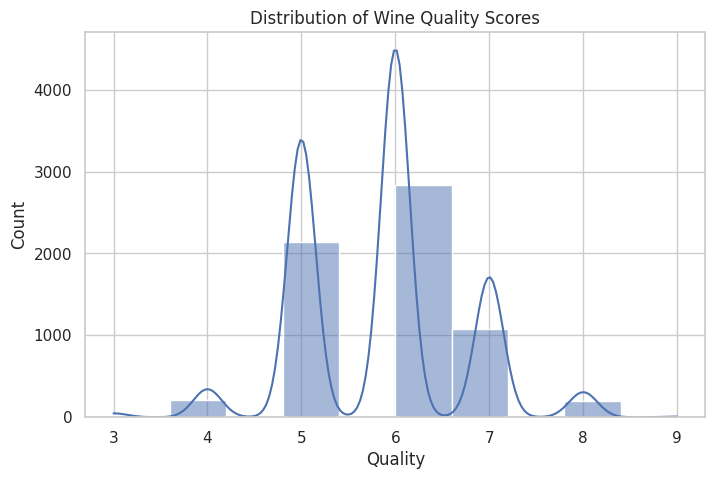

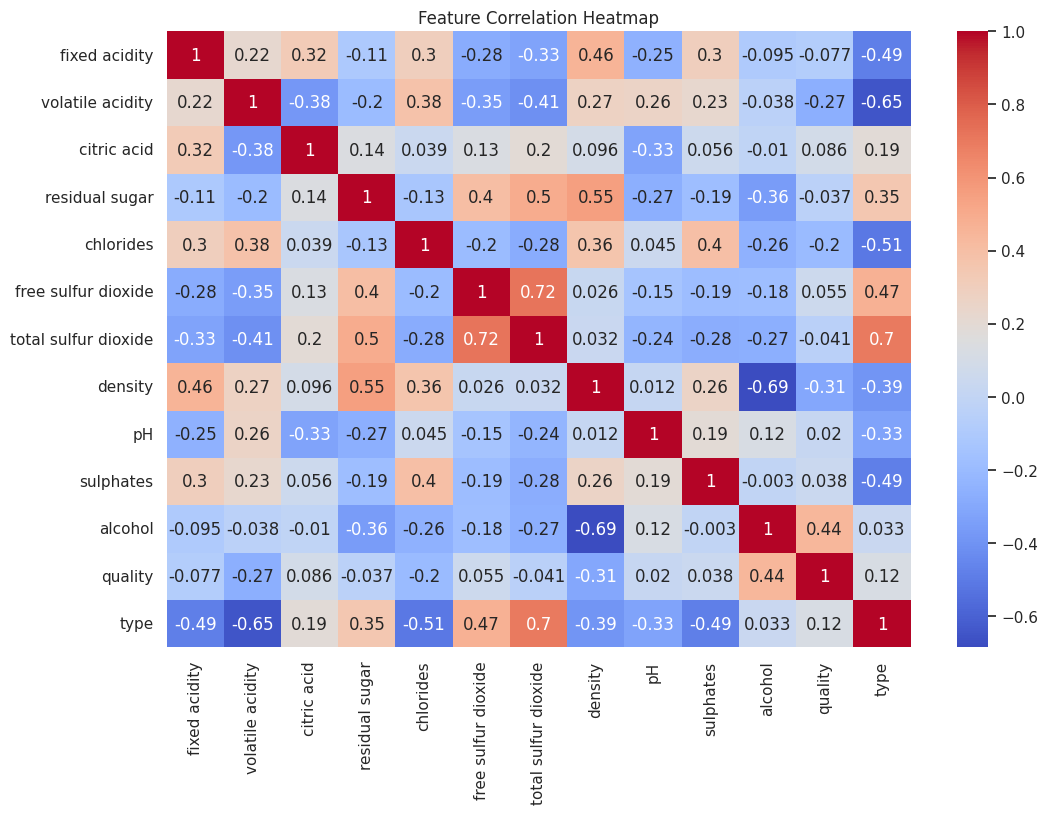

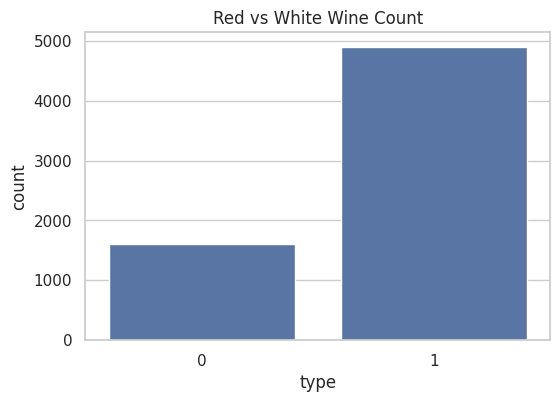

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
# -------------------------------
# Plot the distribution of wine quality scores
plt.figure(figsize=(8,5))
sns.histplot(wine_df['quality'], bins=10, kde=True)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# Plot correlation heatmap to see how features are related
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot number of red vs white wines in datas
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=wine_df)
plt.title("Red vs White Wine Count")
plt.show()

In [ ]:
# Step 5: Data Preprocessing
# -------------------------------
# Convert 'type' column from text to numbers: red=0, white=1
le = LabelEncoder()
wine_df['type'] = le.fit_transform(wine_df['type'])  # red=0, white=1

# Split features and target
X = wine_df.drop('quality', axis=1) # Separate features (X) = all columns except quality

y = wine_df['quality'] # Target (y) = the quality score we want to predict

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Classification Accuracy: 0.666923076923077
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.62      0.12      0.20        43
           5       0.66      0.72      0.69       402
           6       0.66      0.74      0.70       597
           7       0.71      0.54      0.62       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.51      0.35      0.38      1300
weighted avg       0.67      0.67      0.66      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


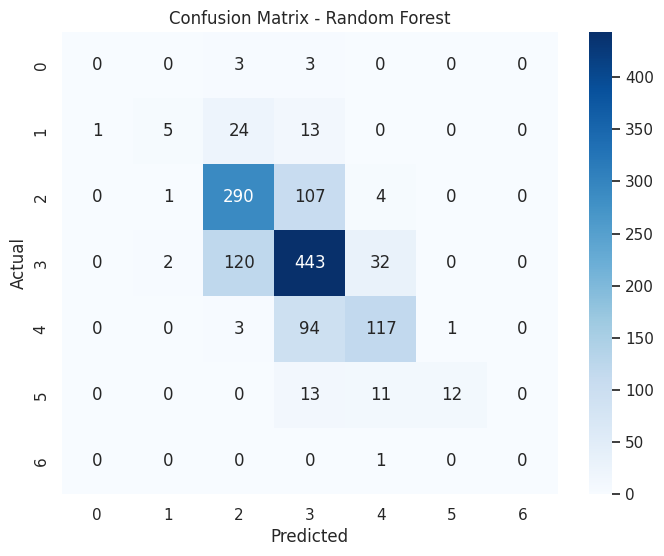

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.64903846 0.67211538 0.65255053 0.66794995 0.68431184]
Mean CV Score: 0.6651932331383728


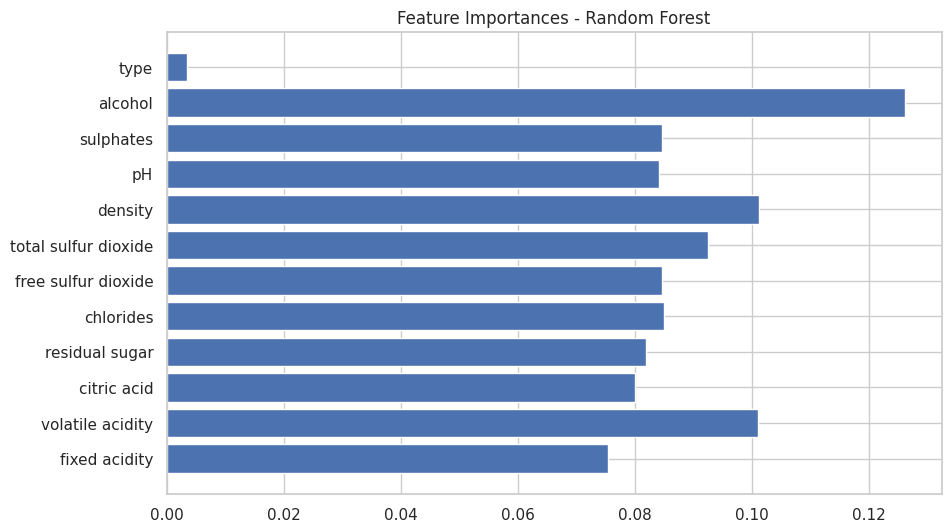

In [ ]:
# Step 6: Classification (Random Forest)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
# Print precision, recall, and F1-score for each quality
print("Classification Report:\n", classification_report(y_test, y_pred))



# Create confusion matrix (shows where predictions were right/wrong)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Perform cross-validation (split data multiple times for stability check)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Plot how important each feature is in predicting quality
importances = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.title("Feature Importances - Random Forest")
plt.show()

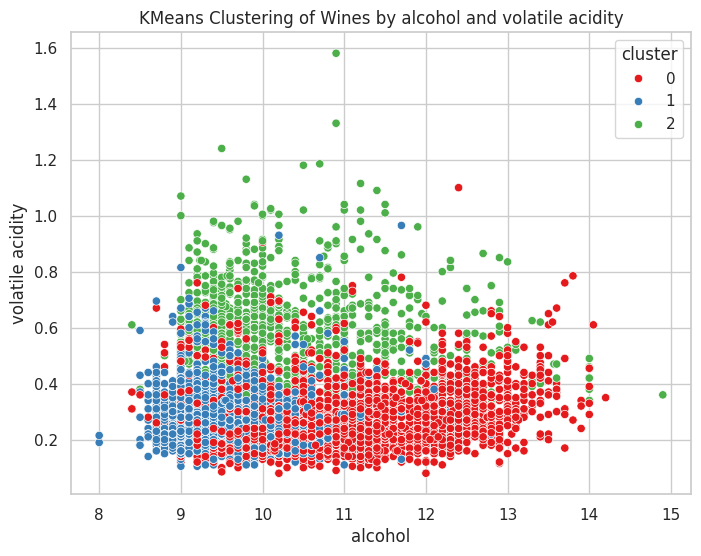

In [ ]:
# Step 7: Clustering (KMeans)

# Fit model to scaled data and get cluster labels

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster column to dataset
wine_df['cluster'] = clusters

# Visualize clusters (using specified features)
# You can change 'feature1' and 'feature2' to any column names from the original DataFrame
feature1 = 'alcohol'  # Example: using 'alcohol'
feature2 = 'volatile acidity' # Example: using 'volatile acidity'

plt.figure(figsize=(8,6))
sns.scatterplot(x=wine_df[feature1], y=wine_df[feature2], hue=wine_df['cluster'], palette='Set1')
plt.title(f"KMeans Clustering of Wines by {feature1} and {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

In [ ]:
#Step 8: DONE
# -------------------------------
print("Notebook Complete! Dataset is preprocessed, classified, clustered, and visualized.")

Notebook Complete! Dataset is preprocessed, classified, clustered, and visualized.
